# <center> Exploratory data analysis with Pandas

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!ls

Mounted at /content/drive
drive  sample_data


## 1. Demonstration of main Pandas methods

**[Pandas](http://pandas.pydata.org)** is a Python library that provides extensive means for data analysis. Data scientists often work with data stored in table formats like `.csv`, `.tsv`, or `.xlsx`. Pandas makes it very convenient to load, process, and analyze such tabular data using SQL-like queries. In conjunction with other useful library `Matplotlib` and `Seaborn`, `Pandas` provides a wide range of opportunities for visual analysis of tabular data.

The main data structures in `Pandas` are implemented with **DataFrame** classes. `DataFrames` are great for representing real data: rows correspond to instances (examples, observations, etc.), and columns correspond to features of these instances.

To run each cell we press **Shift+Enter**. Running the first cell should print "Executing the first cell of my class."

In [2]:
print ("Executing the first cell of my class")

Executing the first cell of my class


Next we import python libraries `numpy` and `pandas`. To do so, we execute the below cell

In [3]:
import numpy as np
import pandas as pd
pd.set_option("display.precision", 2)
pd.set_option('display.max_columns', None)

In this assignment, we'll demonstrate the main methods in action by analyzing a [dataset](https://bigml.com/user/francisco/gallery/dataset/5163ad540c0b5e5b22000383) on the churn rate of telecom operator clients. Let's read the data (using `read_csv`), and take a look at the first 5 lines using the `head` method:

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Proj1_Files_F21/Experiment - 1/telecom_churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Recall that each row corresponds to one client, an **instance**, and columns are **features** of this instance.

Let’s have a look at data dimensionality, feature names, and feature types.

In [5]:
print(df.shape)

(3333, 21)


From the output, we can see that the table contains 3333 rows and 21 columns.

Now let's try printing out column names using `columns`:

In [6]:
print(list(df.columns)) 
for i in range(len(list(df.columns))):
  print(list(df.columns)[i])

['state', 'account length', 'area code', 'phone number', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']
state
account length
area code
phone number
international plan
voice mail plan
number vmail messages
total day minutes
total day calls
total day charge
total eve minutes
total eve calls
total eve charge
total night minutes
total night calls
total night charge
total intl minutes
total intl calls
total intl charge
customer service calls
churn


We can use the `info()` method to output some general information about the dataframe. Note that the 'object' data type refers to categorical variables in this data set. '3333 non-null' means that all 3333 values of the corresponding variable are not missing.  

In [7]:
print(df.info())   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

`bool`, `int64`, `float64` and `object` are the data types of our features. We see that one feature is logical (`bool`), 3 features are of type `object`, and 16 features are numeric. With this same method, we can easily see if there are any missing values. Here, there are none because each column contains 3333 observations, the same number of rows we saw before with `shape`.

The `describe` method shows basic statistical characteristics of each numerical feature (`int64` and `float64` types): number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.

In [8]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,437.18,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56
std,39.82,42.37,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00
50%,101.00,415.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00
75%,127.00,510.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00
max,243.00,510.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00


In [33]:
float_columns = df.select_dtypes(include=['float64']).columns
df[float_columns].describe()

,total day minutes,total day charge,total eve minutes,total eve charge,total night minutes,total night charge,total intl minutes,total intl charge
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,179.78,30.56,200.98,17.08,200.87,9.04,10.24,2.76
std,54.47,9.26,50.71,4.31,50.57,2.28,2.79,0.75
min,0.00,0.00,0.00,0.00,23.20,1.04,0.00,0.00
25%,143.70,24.43,166.60,14.16,167.00,7.52,8.50,2.30
50%,179.40,30.50,201.40,17.12,201.20,9.05,10.30,2.78
75%,216.40,36.79,235.30,20.00,235.30,10.59,12.10,3.27
max,350.80,59.64,363.70,30.91,395.00,17.77,20.00,5.40


In order to see statistics on non-numerical features, one has to explicitly indicate data types of interest in the `include` parameter.

In [9]:
df.describe(include=['object', 'bool'])

,state,phone number,international plan,voice mail plan,churn
count,3333,3333,3333,3333,3333
unique,51,3333,2,2,2
top,WV,392-2887,no,no,False
freq,106,1,3010,2411,2850


For categorical (type `object`) and boolean (type `bool`) features we can use the `value_counts` method. Let's have a look at the distribution of `churn`:

In [10]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

2850 users out of 3333 are *loyal*; their `Churn` value is `0`. To calculate fractions, pass `normalize=True` to the `value_counts` function.

In [11]:
df['churn'].value_counts(normalize=True)

False    0.86
True     0.14
Name: churn, dtype: float64


### Sorting

A DataFrame can be sorted by the value of one of the variables (i.e columns). For example, we can sort by *Total day charge* (use `ascending=False` to sort in descending order):


In [12]:
df.sort_values(by='total day charge', ascending=False).head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
365,CO,154,415,343-5709,no,no,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,True
985,NY,64,415,345-9140,yes,no,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,True
2594,OH,115,510,348-1163,yes,no,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,True
156,OH,83,415,370-9116,no,no,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,True
605,MO,112,415,373-2053,no,no,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,True
975,DE,129,510,332-6181,no,no,0,334.3,118,56.83,192.1,104,16.33,191.0,83,8.59,10.4,6,2.81,0,True
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
1679,OK,82,510,393-4823,no,no,0,329.8,73,56.07,208.3,120,17.71,267.1,102,12.02,10.6,6,2.86,0,True
2028,SD,93,510,408-4836,no,no,0,328.1,106,55.78,151.7,89,12.89,303.5,114,13.66,8.7,3,2.35,1,True
197,TX,208,510,378-3625,no,no,0,326.5,67,55.51,176.3,113,14.99,181.7,102,8.18,10.7,6,2.89,2,True


Sorting Total day charge in ascending order

In [13]:
df.sort_values(by='total day charge').head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1345,SD,98,415,392-2555,no,no,0,0.0,0,0.00,159.6,130,13.57,167.1,88,7.52,6.8,1,1.84,4,True
1397,VT,101,510,413-7655,no,no,0,0.0,0,0.00,192.1,119,16.33,168.8,95,7.60,7.2,4,1.94,1,False
2736,OK,127,510,403-1128,no,yes,27,2.6,113,0.44,254.0,102,21.59,242.7,156,10.92,9.2,5,2.48,3,False
2753,OH,134,415,406-4158,no,no,0,7.8,86,1.33,171.4,100,14.57,186.5,80,8.39,12.9,2,3.48,2,False
1986,WI,70,415,405-9233,no,no,0,7.9,100,1.34,136.4,83,11.59,156.6,89,7.05,12.1,1,3.27,0,False
1052,OR,98,415,378-6772,yes,no,0,12.5,67,2.13,256.6,90,21.81,169.4,88,7.62,7.7,9,2.08,1,False
2252,NH,148,408,333-7449,no,no,0,17.6,121,2.99,161.7,125,13.74,203.1,82,9.14,10.6,6,2.86,1,False
3046,MI,110,510,357-5784,no,no,0,18.9,92,3.21,258.4,81,21.96,109.6,74,4.93,14.8,4,4.00,1,False
1621,SC,138,510,370-9533,no,yes,21,19.5,149,3.32,140.9,109,11.98,179.7,111,8.09,7.9,1,2.13,0,False
1076,WY,53,415,337-4339,no,yes,27,25.9,119,4.40,206.5,96,17.55,228.1,64,10.26,6.5,7,1.76,1,False


### Indexing and retrieving data

A DataFrame can be indexed in a few different ways. 

To get a single column/feature, you can use a `DataFrame['Name']` construction. Let's use this to answer a question about that column alone: **what is the proportion of churned users in our dataframe?**

In [14]:
df['churn'].mean()

0.14491449144914492

14.5% is actually quite bad for a company; such a churn rate can make the company go bankrupt.

**Boolean indexing** with one column is also very convenient. The syntax is `df[df['Name'] == P]`, where `P` is some logical condition that is checked for each element of the `Name` column. The result of such indexing is the DataFrame consisting only of rows that satisfy the `P` condition on the `Name` column. 

Lets use it to see all customers who have churned out of the company **('churn' == 1)**


In [34]:
df[df['churn'] == True].head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,many_service_calls
10,IN,65,415,no,no,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True,1
15,NY,161,415,no,no,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True,1
21,CO,77,408,no,no,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True,1
33,AZ,12,408,no,no,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True,0
41,MD,135,408,yes,yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True,0


In [35]:
df[df['churn'] == False].head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,many_service_calls
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,0
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,0
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,0
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,0
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,0


Let's answer the question:

**What are average values of numerical features for churned users?**

In [16]:
df[df['churn'] == True].mean()

account length            102.66
area code                 437.82
number vmail messages       5.12
total day minutes         206.91
total day calls           101.34
total day charge           35.18
total eve minutes         212.41
total eve calls           100.56
total eve charge           18.05
total night minutes       205.23
total night calls         100.40
total night charge          9.24
total intl minutes         10.70
total intl calls            4.16
total intl charge           2.89
customer service calls      2.23
churn                       1.00
dtype: float64

**What are average values of numerical features for non-churned users?**

In [17]:
df[df['churn'] == False].mean()

account length            100.79
area code                 437.07
number vmail messages       8.60
total day minutes         175.18
total day calls           100.28
total day charge           29.78
total eve minutes         199.04
total eve calls           100.04
total eve charge           16.92
total night minutes       200.13
total night calls         100.06
total night charge          9.01
total intl minutes         10.16
total intl calls            4.53
total intl charge           2.74
customer service calls      1.45
churn                       0.00
dtype: float64

**How much time (on average) do churned users spend on the phone during daytime?**

In [18]:
df[df['churn'] == True]['total day minutes'].mean()

206.91407867494814


**What is the maximum length of international calls among loyal users (`churn == 0`) who do not have an international plan?**



In [19]:
df[(df['churn'] == False) & (df['international plan'] == 'no')]['total intl minutes'].max()

18.9


### Grouping

In general, grouping data in Pandas works as follows:



```python
df.groupby(by=grouping_columns)[columns_to_show].function()
```


1. First, the `groupby` method divides the `grouping_columns` by their values. They become a new index in the resulting dataframe.
2. Then, columns of interest are selected (`columns_to_show`). If `columns_to_show` is not included, all non groupby clauses will be included.
3. Finally, one or several functions are applied to the obtained groups per selected columns.

Here is an example where we group the data according to the values of the `Churn` variable and display statistics of three columns in each group:

In [20]:
columns_to_show = ['total day minutes', 'total eve minutes', 'total night minutes']

df.groupby(['churn'])[columns_to_show].describe(percentiles=[])

total day minutes                                   total eve minutes  \
                  count    mean    std  min    50%    max             count   
churn                                                                         
False            2850.0  175.18  50.18  0.0  177.2  315.6            2850.0   
True              483.0  206.91  69.00  0.0  217.6  350.8             483.0   

                                         total night minutes                 \
         mean    std   min    50%    max               count    mean    std   
churn                                                                         
False  199.04  50.29   0.0  199.6  361.8              2850.0  200.13  51.11   
True   212.41  51.73  70.9  211.3  363.7               483.0  205.23  47.13   

                            
        min     50%    max  
churn                       
False  23.2  200.25  395.0  
True   47.4  204.80  354.9


### Summary tables

Suppose we want to see how the observations in our sample are distributed in the context of two variables - `churn` and `international plan`. To do so, we can build a **contingency table** using the `crosstab` method:



In [21]:
pd.crosstab(df['churn'], df['international plan'])

international plan,no,yes
churn,,
False,2664,186
True,346,137


In [22]:
pd.crosstab(df['churn'], df['voice mail plan'])

voice mail plan,no,yes
churn,,
False,2008,842
True,403,80



### DataFrame transformations

Like many other things in Pandas, adding columns to a DataFrame can be performed in many ways.

For example, if we want to calculate the total charge of calls for all users, let's create the `total charge` Series and paste it into the DataFrame:



Notice the last column "total charge," which we have added in our data frame 

In [23]:
df['total charge'] = df['total day charge'] + df['total eve charge'] + \
                     df['total night charge'] + df['total intl charge']
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total charge
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,75.56
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,59.24
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,62.29
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,66.80
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,52.09


To delete columns or rows, use the `drop` method, passing the required indexes and the `axis` parameter (`1` if you delete columns, and nothing or `0` if you delete rows). The `inplace` argument tells whether to change the original DataFrame. With `inplace=False`, the `drop` method doesn't change the existing DataFrame and returns a new one with dropped rows or columns. With `inplace=True`, it alters the DataFrame.

In [24]:
# get rid of just created column and phone number                
df.drop(['total charge', 'phone number'], axis=1, inplace=True) 
# and here’s how you can delete rows
#df.drop([1, 2]).head() 

## 2. First attempt at predicting telecom churn


Let's see how churn rate is related to the *International plan* feature. We'll do this using a `crosstab` contingency table and also through visual analysis with `Seaborn`


In [38]:
pd.crosstab(df['churn'], df['international plan'], margins=True)

international plan,no,yes,All
churn,,,
False,2664,186,2850
True,346,137,483
All,3010,323,3333


In [26]:
# some imports to set up plotting 
import matplotlib.pyplot as plt
# pip install seaborn 
import seaborn as sns
# Graphics in retina format are sharper and more legible
%config InlineBackend.figure_format = 'retina'

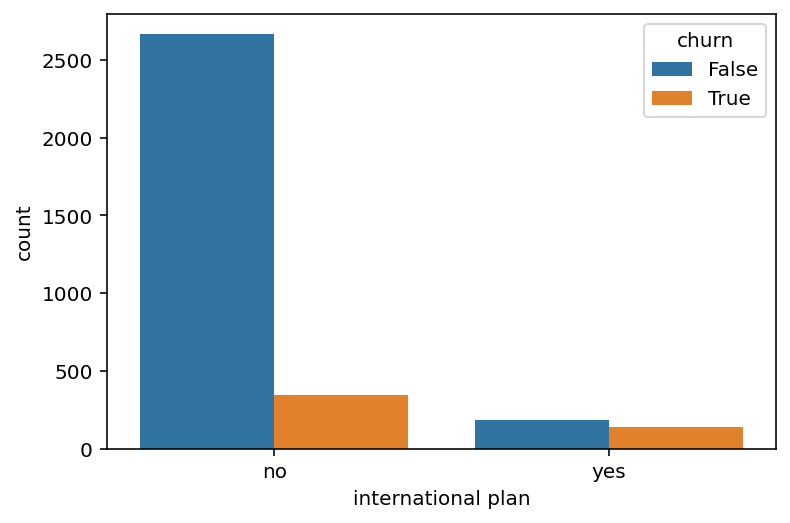

In [27]:
sns.countplot(x='international plan', hue='churn', data=df);


We see that, with *International Plan*, the churn rate is much higher, which is an interesting observation! Perhaps large and poorly controlled expenses with international calls are very conflict-prone and lead to dissatisfaction among the telecom operator's customers.

Next, let's look at another important feature – *Customer service calls*. Let's also make a summary table and a picture.

In [28]:
pd.crosstab(df['churn'], df['customer service calls'], margins=True)

customer service calls,0,1,2,3,4,5,6,7,8,9,All
churn,,,,,,,,,,,
False,605,1059,672,385,90,26,8,4,1,0,2850
True,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


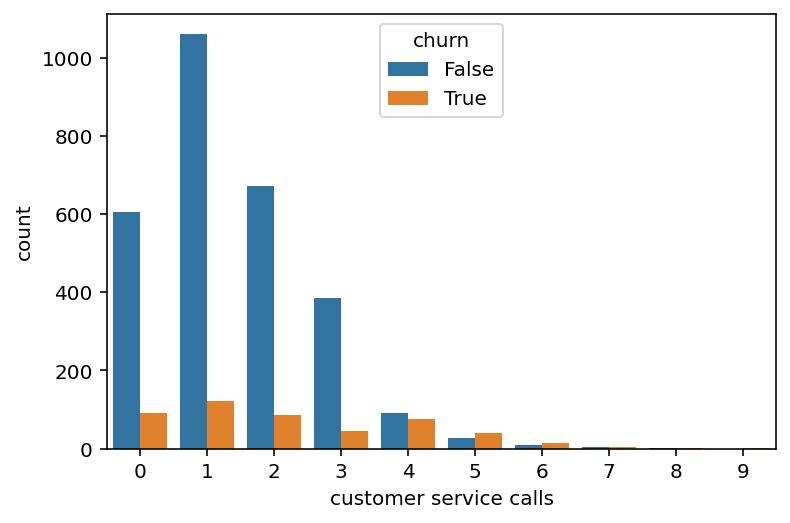

In [29]:
sns.countplot(x='customer service calls', hue='churn', data=df);

Although it's not so obvious from the summary table, it's easy to see from the above plot that the churn rate increases sharply from 4 customer service calls and above.

Now let's add a binary feature to our DataFrame – `Customer service calls > 3`. And once again, let's see how it relates to churn. 

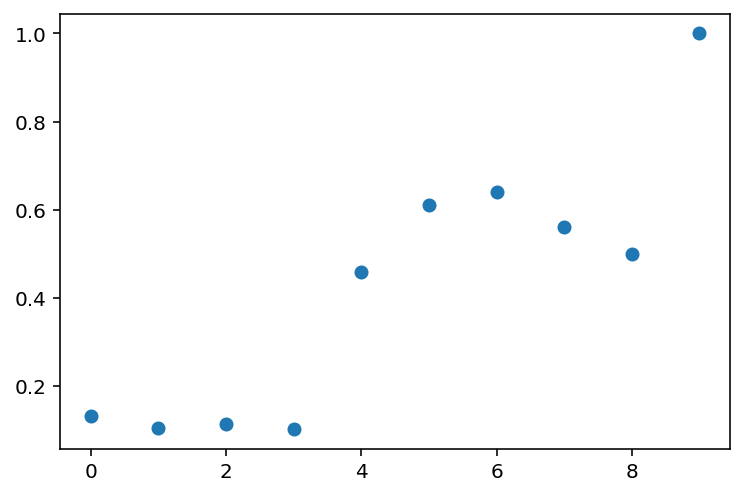

In [47]:
service_calls = [0,1,2,3,4,5,6,7,8,9]
prob = [0.132,0.103,0.114,0.102,0.458,0.61,0.64,0.56,0.5,1]
plt.scatter(service_calls,prob)
plt.show()

In [48]:
df['many_service_calls'] = (df['customer service calls'] > 3).astype('int')

pd.crosstab(df['many_service_calls'], df['churn'], margins=True)

churn,False,True,All
many_service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


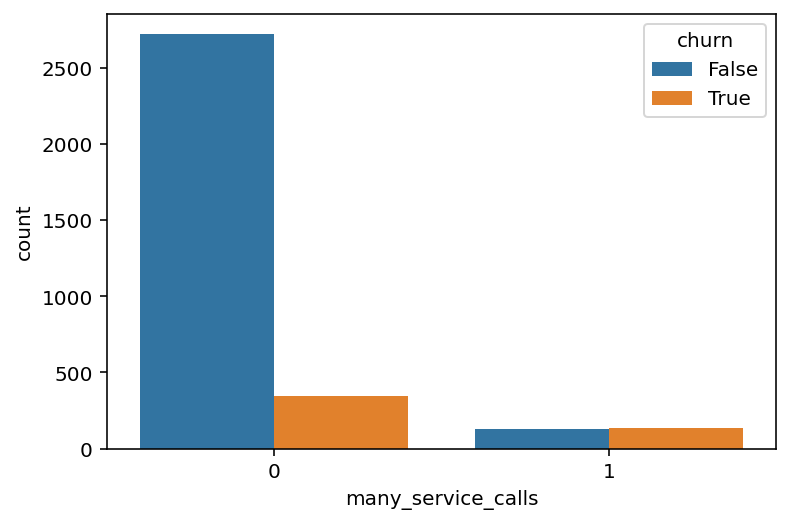

In [31]:
sns.countplot(x='many_service_calls', hue='churn', data=df);


Let's construct another contingency table that relates *Churn* with both *International plan* and freshly created *Many_service_calls*.



In [32]:
pd.crosstab(df['many_service_calls'] & (df['international plan'] == 'yes') , df['churn'], margins=True)

churn,False,True,All
row_0,,,
False,2841,464,3305
True,9,19,28
All,2850,483,3333


Therefore, predicting that a customer is not loyal (*Churn*=1) in the case when the number of calls to the service center is greater than 3 and the *International Plan* is added (and predicting *Churn*=0 otherwise), we might expect an accuracy of 85.8% (we are mistaken only 464 + 9 times). This number, 85.8%, that we got through this very simple reasoning serves as a good starting point (*baseline*) for the further machine learning models that we will build. 

Recall that, before the advent of machine learning, the data analysis process looked something like this. Let's recap what we've covered:
    
- The share of loyal clients in the sample is 85.5%. The most naive model that always predicts a "loyal customer" on such data will guess right in about 85.5% of all cases. That is, the proportion of correct answers (*accuracy*) of subsequent models should be no less than this number, and will hopefully be significantly higher;
- With the help of a simple forecast that can be expressed by the following formula: "International plan = True & Customer Service calls > 3 => Churn = 1, else Churn = 0", we can expect a guessing rate of 85.8%, which is just above 85.5%. 
- We got these two baselines without applying machine learning, and they'll serve as the starting point for our subsequent models. 

This notebook is adaption from the following kaggle notebook https://www.kaggle.com/kashnitsky/topic-1-exploratory-data-analysis-with-pandas. 